#  FFNN Model With Pre-Trained ELMo Embedding

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
data[1000:].head(10)

,id,keyword,location,text,target
1000,1452,body%20bagging,NaN,#OVOFest Drake straight body bagging Meek on t...,0
1001,1453,body%20bagging,NaN,I'm not a Drake fan but I enjoy seeing him bod...,0
1002,1454,body%20bagging,NaN,@amaramin3 Meek is definitely capable of body ...,0
1003,1455,body%20bagging,3?3?7?SLOPelousas??2?2?5?,Gates not body bagging nobody???????? niggas i...,0
1004,1456,body%20bagging,NaN,WWE 2k15 MyCareer EP18 Tyrone body bagging dud...,0
1005,1458,body%20bagging,316,'I did another one I did another one. You stil...,1
1006,1459,body%20bagging,Global,Drake Body Bagging Meek. He must of hit a sens...,0
1007,1460,body%20bagging,#WhereverI'mAt,Good diss bad beat and flow. Mark my words Mee...,0
1008,1463,body%20bagging,"Huber Heights, OH",@Drake is body bagging meek meanwhile he's on ...,0
1009,1464,body%20bagging,NaN,@MzGracieBaby for the record im jumpin out the...,0


In [2]:
data['text'] = data['text'].str.replace('http\S+', 'http', regex=True)  # replace all URLs with "http"
data['text'] = data['text'].str.replace('&\S+', '', regex=True)  # remove all html junks
data['text'] = data['text'].str.replace('[0-9]','0', regex=True)  # replace all integer valeus with 0
data['text'] = data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
data['text'] = data['text'].str.lower()

data[1000:].head(10)

,id,keyword,location,text,target
1000,1452,body%20bagging,NaN,ovofest drake straight body bagging meek on th...,0
1001,1453,body%20bagging,NaN,im not a drake fan but i enjoy seeing him body...,0
1002,1454,body%20bagging,NaN,amaramin0 meek is definitely capable of body b...,0
1003,1455,body%20bagging,3?3?7?SLOPelousas??2?2?5?,gates not body bagging nobody niggas in br rea...,0
1004,1456,body%20bagging,NaN,wwe 0k00 mycareer ep00 tyrone body bagging dud...,0
1005,1458,body%20bagging,316,i did another one i did another one you still ...,1
1006,1459,body%20bagging,Global,drake body bagging meek he must of hit a sensi...,0
1007,1460,body%20bagging,#WhereverI'mAt,good diss bad beat and flow mark my words meek...,0
1008,1463,body%20bagging,"Huber Heights, OH",drake is body bagging meek meanwhile hes on to...,0
1009,1464,body%20bagging,NaN,mzgraciebaby for the record im jumpin out the ...,0


In [3]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

def lemmatize(pd_series):
    ret = []
    for entry in pd_series:
        words = entry.split()
        lemm_sent = [lemm.lemmatize(word) for word in words]
        ret.append(lemm_sent)
    return ret

lemmatize(['Kevin drinks', 'Yoon lives again'])

[['Kevin', 'drink'], ['Yoon', 'life', 'again']]

In [4]:
# from simple_elmo import ElmoModel

# elmo = ElmoModel()
# elmo.load('./209')  # http://vectors.nlpl.eu/repository/  ELMo with 1024 dim vectors

# result = elmo.get_elmo_vector_average([['Kevin', 'drink'], ['Yoon', 'life', 'again']])
# print(result.shape)  # (2, 1024) --> (sentence_count, ELMo Embedding Size)

In [5]:
# seq_input = lemmatize(data['text'])
# seq_input = elmo.get_elmo_vector_average(seq_input)

# import pickle

# with open('ELMo2/seq_input_elmo.pickle', 'wb') as file:
#     pickle.dump(seq_input, file) 

In [6]:
import pickle

with open('ELMo2/seq_input_elmo.pickle', 'rb') as file:
    seq_input = pickle.load(file)

output = data['target'].to_numpy()

print("seq_input Shape: ", seq_input.shape)
print("output Shape: ", output.shape)

seq_input Shape:  (7613, 1024)
output Shape:  (7613,)


In [7]:
import tensorflow as tf

x_seq = tf.keras.layers.Input(shape=(1024), name='seq_input')


x = tf.keras.layers.Dense(256, activation='relu')(x_seq)
x = tf.keras.layers.Dropout(0.2)(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
seq_input (InputLayer)       [(None, 1024)]            0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 262,657
Trainable params: 262,657
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x={'seq_input':seq_input}, y=output, epochs=50, validation_split=0.2)

Epoch 1/50
191/191 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7800 - val_loss: 0.4215 - val_accuracy: 0.7991
Epoch 2/50
191/191 [==============================] - 1s 3ms/step - loss: 0.4201 - accuracy: 0.8177 - val_loss: 0.4091 - val_accuracy: 0.8024
Epoch 3/50
191/191 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8220 - val_loss: 0.4094 - val_accuracy: 0.8194
Epoch 4/50
191/191 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8284 - val_loss: 0.4146 - val_accuracy: 0.8201
Epoch 5/50
191/191 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8304 - val_loss: 0.4180 - val_accuracy: 0.8181
Epoch 6/50
191/191 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8327 - val_loss: 0.4152 - val_accuracy: 0.8207
Epoch 7/50
191/191 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8415 - val_loss: 0.4131 - val_accuracy: 0.8207
Epoch 

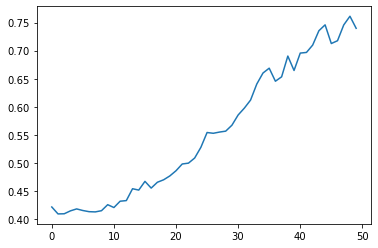

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

In [10]:
# rebuild the same model to reset weights

x_seq = tf.keras.layers.Input(shape=(1024), name='seq_input')

x_seq = tf.keras.layers.Input(shape=(1024), name='seq_input')


x = tf.keras.layers.Dense(256, activation='relu')(x_seq)
x = tf.keras.layers.Dropout(0.2)(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
seq_input (InputLayer)       [(None, 1024)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 262,657
Trainable params: 262,657
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x={'seq_input':seq_input}, y=output, epochs=5)

Epoch 1/5
238/238 [==============================] - 1s 3ms/step - loss: 0.4632 - accuracy: 0.7887
Epoch 2/5
238/238 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8147
Epoch 3/5
238/238 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8241
Epoch 4/5
238/238 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8290
Epoch 5/5
238/238 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8309


In [12]:
# Apply Preprocssing to Test Data

test_data = pd.read_csv('test.csv')

# test_data['text'] = test_data['text'].str.replace('http\S+', 'http', regex=True)
# test_data['text'] = test_data['text'].str.replace('&\S+', '', regex=True)
# test_data['text'] = test_data['text'].str.replace('[0-9]','0', regex=True)
# test_data['text'] = test_data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
# test_data['text'] = test_data['text'].str.lower()

# seq_input_test = lemmatize(test_data['text'])

# seq_input_test = elmo.get_elmo_vector_average(seq_input_test)

# with open('ELMo2/seq_input_test_elmo.pickle', 'wb') as file:
#     pickle.dump(seq_input_test, file)

with open('ELMo2/seq_input_test_elmo.pickle', 'rb') as file:
    seq_input_test = pickle.load(file)

print("seq_input_test Shape: ", seq_input_test.shape)

seq_input_test Shape:  (3263, 1024)


In [13]:
pred = model.predict(x={'seq_input':seq_input_test})
pred = np.asarray(np.rint(pred), dtype=int)
pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [14]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['target'] = pred
submission.head(10)

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [15]:
submission.to_csv('submission3-2.csv', index=False)
# Accuracy Score : 0.81703